##### Build Pyramid

We can render an ASCII art pyramid with N levels by printing N rows of asterisks, 
where the top row has a single asterisk in the center and each successive row has 
two additional asterisks on either side.


In [ ]:

def print_pyramid(levels):
    width = 2 * levels - 1  # The width of the base of the pyramid
    for i in range(levels):
        num_asterisks = 2 * i + 1
        num_spaces = (width - num_asterisks) // 2
        row = ' ' * num_spaces + '*' * num_asterisks + ' ' * num_spaces
        print(row)


In [ ]:

# Example usage:
N = 5
print_pyramid(N)


### Notes:

In [ ]:
infinit_num = float('inf') # != int('inf')
neg_infinit_num = float('-inf')

```python
max_int = sys.maxint # AVAILABLE ONLY FOR PYTHON-2.
```

In [ ]:
max_int = sys.maxsize
print(type(max_int))
max_int

In [ ]:
math.log2(max_int), math.log10(max_int)

In [ ]:
min_int = - sys.maxsize
print(type(min_int))
min_int

### Most Usefull Python API for Technical Interview

In [ ]:
d = {'a': 1, 'b': 2, 'c':3, 'z':-10, 'w':0,'d':-1}

#### `sorted(...)`:

In [ ]:
sorted(d.items(), key=lambda x: x[1])

In [ ]:
sorted(d.items(), key=lambda x: -x[1])

In [ ]:
sorted(d.items(), key=lambda item: item[1], reverse=True)

#### `map(...)`:

In [ ]:
def square(x): return x**2

In [ ]:
mapimg = map(math.sqrt, [x**2 for x in range(2, 32, 4)]); mapimg

In [ ]:
[*map(math.sqrt, [x**2 for x in range(2, 32, 4)])]

In [ ]:
squars = list(map(lambda x: x**2, range(5))); squars

<font color='magenta'> Two-argument function into `map(...)`

In [ ]:
help(math.pow)

In [ ]:
powers = [*map(math.pow, range(5), range(10))]; powers

#### `filter(...)`:

In [ ]:
from random import randrange
L = [randrange(1,10) for _ in range(10)]; L

In [ ]:
evens = [*filter(lambda x: x%2 == 0, L)]; evens

#### `functools.reduce(...)`:

In [ ]:
help(reduce)

In [ ]:
#******* String to integer Convertion *******
def string_to_int(s: str) -> int:
    s = s[s[0] == '-':]
    sign = -1 if s[0] == '-' else 1
    callback = lambda res, item: res * 10 + string.digits.index(item)
    return reduce(callback, s, 0) * sign

#### `functools.lru_cache(...)`

#### `itertools.accumulate(...)`

In [ ]:
from itertools import accumulate
help(accumulate)

#### `collections.namedtuple(arg1, arg2)`:

Builds PriorityQueueNode with comparable interface out of namedtuple !

In [ ]:
from collections import namedtuple
PQNode = namedtuple('PQNode', ('value', 'cur_list', 'idx'))

### Hashing

##### [Horner's Method](https://en.wikipedia.org/wiki/Horner%27s_method)

<b style="color:red">Evaluate $n^{th}$ degree polynomials without the power function<b/>

The quadratic (i.e. degree 2) polynomial, $ y = c_0 x^2 + c_1 x + c_2 $, can be rearranged as 
$$
\begin{split} 
    y &= c_0 x^2 + c_1 x + c_2 \\
      &= (c_0 x + c_1) x + c_2
\end{split}
$$

The same pattern can be applied to a cubic (degree 3) polynomial, $ y = c_0 x^3 + c_1 x^2 + c_2 x + c_3$ as
$$
\begin{split} 
    y &= c_0 x^3 + c_1 x^2 + c_2 x + c_3 \\
      &= \big( (c_0 x + c_1) x + c_2 \big) x + c_3 
\end{split}
$$

Similarly for $n^{th}$ degree Plynomial:
$$
\begin{split} 
    y &= c_0 x^n + c_1 x^{n-1} + c_2 x^{n-2} + c_3 x^{n-3} + c_4 x^{n-4} + \cdots + c_{n-2} x^2 + c_{n-1} x + c_{n} \\
      &= \bigg( \Big( \big( (c_0 x + c_1) x + c_2\big) x + \cdots + c_{n-2} \Big) x + c_{n-1} \bigg) x + c_{n}
\end{split}
$$

This pattern is called `Horner's rule` for evaluating a polynomial. For hand calculation of low degree, it makes sense to use direct computation of the polynomial in its standard form. To evaluate a polynomial in a computer program, Horner's rule makes more sense, especially if speed and accuracy are important and the degree of the polynomial is large.

Here is an code that uses Horner's rule to repeatedly evaluate the same polynomial. The correct value is 1070.8.

**y = horner(n: int, c: List[float], x: float)** evaluates a polynomial **y = f(x)** at **x**.  

`NOTE:`
- The polynomial has degree **n**.  The coefficients of the polynomial are stored in the 1-D Python list `c`, which has `n+1` elements.

- If there are `n+1` coefficient, the polynomial is of degree `n` and the largest index in `c` is `n` as per as `c` is a Python list. Alternatively, if there are `n` coefficients, the polynomial is of degree `n-1` and the largest index in `c` is `n-1`

- The elements of `c` are multipliers of monomial terms of decreasing order. In other words, the polynomial is assumed to be written in the following form:


\begin{equation} \label{eq: 1}
\begin{split} 
    y_n &= c_0 x^n + c_1 x^{n-1} + c_2 x^{n-2} + c_3 x^{n-3} + c_4 x^{n-4} + \cdots + c_{n-2} x^2 + c_{n-1} x + c_{n} \\
      &= \bigg( \Big( \big( (c_0 x + c_1) x + c_2\big) x + \cdots + c_{n-2} \Big) x + c_{n-1} \bigg) x + c_{n}
\end{split}
\end{equation}

\begin{equation} \label{eq: 2}
\begin{split} 
    y_{n-1} &= y_n - c_0 x^n \\
\end{split}
\end{equation}

\begin{equation} \label{eq: 3}
\begin{split} 
    y_{n+1} &= (y_n) \cdot x + c_{n+1} \\
      &= \left[ c_0 x^n + c_1 x^{n-1} + c_2 x^{n-2} + c_3 x^{n-3} + c_4 x^{n-4} + \cdots + c_{n-2} x^2 + c_{n-1} x + c_{n} \right] \cdot x + c_{n+1} \\
      &= c_0 x^{n+1} + c_1 x^n + c_2 x^{n-1} + c_3 x^{n-2} + c_4 x^{n-3} + c_5 x^{n-4} + \cdots + c_{n-2} x^2 + c_{n-1} x + c_{n}
\end{split}
\end{equation}

- In context of `Rolling Hash` for string using `Horner's Rule`, where $c_i$ = `ord(string[i])` and `x = 26` (number of English Alphabets) and exponents are the positions `string[i]` (a char) in the considering string of pattern, we can compute the hash for each string of window from the previous string of window as following

\begin{equation} \label{eq: 4}
\begin{split} 
    y_{n_{currentWindow}} &= (y_{n_{previousWindow}} - c_0 \cdot x^n) \cdot x + c_n
\end{split}
\end{equation}

In [ ]:
def horner(n: int, c: List[float], x: float):
    """
    Args:
        n (int): The degree of polynomial.
        c (list): List of coefficients of nth degree polynomial whose length is n+1.
        x (int): The value at which nth degree polynomial to be computed.
    Notes: 
        * c[i] is the coefficient of x^i
        * Polynomial Layout: C0x^n + c1x^n-1 + ... + cn
    """
    h = 0
    for i in range(n+1):
        # (i=1) => c0x + c1, (i=2) => (c0x + c1)x + c2, ...
        h = h*x + c[i]
    return h

In [ ]:
def horner_pythonic(L: List[float], x: float):
    return reduce(lambda h, c: h*x + c, L, 0)

In [ ]:
def horner2(n: int, c: List[float], x: float):
    """
    Args:
        n (int): The degree of polynomial
        c (list): List of coefficients of nth degree polynomial whose length is n+1.
        x (int): The value at which nth degree polynomial to be computed
    Notes: c[i] is the coefficient of x^i
    """ 
    h = c[0]
    for i in range(1, n+1):
        # (i=1) => c0x + c1, (i=2) => (c0x + c1)x + c2, ...
        h = h*x + c[i]
    return h

In [ ]:
def horner_niave(n: int, c: List[float], x: float):
    """
    Args:
        n (int): The degree of polynomial.
        c (list): List of coefficients of nth degree polynomial whose length is n+1.
        x (int): The value at which nth degree polynomial to be computed.
    """
    res = 0
    for idx, coefficient in zip(reversed(range(n+1)), c):
        res = res + coefficient * x**idx
    return res

In [ ]:
def _test_horner():
    n = 2         # Degree of polynomial
    c = [1,2,3]   # n+1 coeffcients for n degree polynomial
    x = 2
    assert horner_niave(n, c, x) == horner(n, c, x) == horner2(n, c, x) == horner_pythonic(c, x)
# =========================================================================
_test_horner()

$
p(x)=a_{0}+x{\bigg (}a_{1}+x{\Big (}a_{2}+x{\big (}a_{3}+ \cdots + x \big( a_{n-2} + x(a_{n-1} + x a_{n}) \big)\cdots {\big )}{\Big )}{\bigg )}
$

In [ ]:
def horner_v2(x, a):
    """
    Use Horner's method to compute and return the polynomial
    a[0] + a[1] x^1 + a[2] x^2 + ... + a[n-1] x^(n-1) evaluated at x.
    """
    h = 0
    for i in range(len(a) - 1, -1, -1):
        # (i=n-1) => a[n-1] + x.a[n], (i=n-2) => a[n-2] + x(a[n-1] + x.a[n])
        h = a[i] + (x * h)
    return h

In [ ]:
c = [1.0, 3.0, 2.1, 4.0, -1.7]
a = [*reversed(c)] # Coefficients of made-up polynomial  
x = 5.0
z = horner_v2(x,a)
print(z)

#### Theory:

- [SanDiego State university](https://www.youtube.com/watch?v=jtMwp0FqEcg)

<img src='../assets/Rolling_Hash.png'>

In context of `Rolling Hash` for string using `Horner's Rule`, where $c_i$ = `ord(string[i])` and `x = 26` (number of English Alphabets) and exponents are the positions `string[i]` (a character) in the considering string, we can compute the hash for each string of window from the previous string of window as following

$$
\begin{equation} \label{eq: 4}
\begin{split} 
    y_{n_{currentWindow}} &= (y_{n_{previousWindow}} - c_0 x^n) \cdot x + c_n
\end{split}
\end{equation}
$$

If we need ot address the overflow of floting or integer values, we can augment the algorithms using moduler arithmatics as follows,

<img src='../assets/Rolling_Hash_Mod.png'>

#### Roling Hash Implementation:

In [ ]:
class RollingHash:
    """Produces hash values for a rolling sequence."""
    def __init__(self, s):
        self.HASH_BASE = 7
        self.seqlen = len(s)
        n = self.seqlen - 1
        h = 0
        for c in s:
            h += ord(c) * (self.HASH_BASE ** n)
            n -= 1
        self.curhash = h

    def current_hash(self):
        """Returns the current hash value."""
        return self.curhash

    def slide(self, previtm, nextitm):
        """Updates the hash by removing previtm and adding nextitm. Returns 
        the updated hash value."""
        self.curhash = (self.curhash * self.HASH_BASE) + ord(nextitm)
        self.curhash -= ord(previtm) * (self.HASH_BASE ** self.seqlen)
        return self.curhash

### [10 Common Coding Interview Problems](https://www.youtube.com/watch?v=Peq4GCPNC5c&t=74s)

- [Inside Code](https://www.youtube.com/playlist?list=PL3edoBgC7ScV9WPytQ2dtso21YrTuUSBd)

##### Youtube Channels:

- [NeetCode](https://www.youtube.com/c/NeetCode/playlists)
- [Nick White](https://www.youtube.com/c/NickWhite/playlists)
- [Blind 75 LeetCode Questions](https://leetcode.com/discuss/general-discussion/460599/blind-75-leetcode-questions)
- [Coderbyte](https://www.youtube.com/c/CoderbyteDevelopers/playlists)

##### 1- Valid anagram:

In [ ]:
from collections import Counter

def are_anagrams(s1, s2):
    if len(s1) != len(s2):
        return False
    return Counter(s1) == Counter(s2)


def are_anagrams(s1, s2):
    if len(s1) != len(s2):
        return False
    return sorted(s1) == sorted(s2)
  
  

##### 2- First and last index:
  

Given a sorted array of integer, `a`,  and a integer, `target`. Find the indexes of first and last occurances of the `target` in the given array.

In [ ]:
def first_and_last(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            start = i
            while i+1 < len(arr) and arr[i+1] == target:
                i += 1
            return [start, i]
    return [-1, -1]

def find_start(arr, target):
    if arr[0] == target:
        return 0
    left, right = 0, len(arr)-1
    while left <= right:
        mid = (left+right)//2
        if arr[mid] == target and arr[mid-1] < target:
            return mid
        elif arr[mid] < target:
            left = mid+1
        else:
            right = mid-1
    return -1


def find_end(arr, target):
    if arr[-1] == target:
        return len(arr)-1
    left, right = 0, len(arr)-1
    while left <= right:
        mid = (left+right)//2
        if arr[mid] == target and arr[mid+1] > target:
            return mid
        elif arr[mid] > target:
            right = mid-1
        else:
            left = mid+1
    return -1

  
def first_and_last(arr, target):
    if len(arr) == 0 or arr[0] > target or arr[-1] < target:
        return [-1, -1]
    start = find_start(arr, target)
    end = find_end(arr, target)
    return [start, end]
  
  

##### 3- Kth largest element:

In [ ]:
def kth_largest(arr, k):
    for i in range(k-1):
        arr.remove(max(arr))
    return max(arr)

def kth_largest(arr, k):
    n = len(arr)
    arr.sort()
    return arr[n-k]


import heapq

def kth_largest(arr, k):
    arr = [-elem for elem in arr]
    heapq.heapify(arr)
    for i in range(k - 1):
        heapq.heappop(arr)
    return -heapq.heappop(arr)
  
  

##### 4- Symmetric tree:

In [ ]:
def are_symmetric(root1, root2):
    if root1 is None and root2 is None:
        return True
    elif ((root1 is None) != (root2 is None)) or root1.val != root2.val:
        return False
    else:
        return are_symmetric(root1.left, root2.right) and are_symmetric(root1.right, root2.left)

def is_symmetric(root):
    if root is None:
        return True
    return are_symmetric(root.left, root.right)

##### 5- Generate parentheses:

Given an inteeger, `n`, generate all teh valid combinations of n pair of parenthesis

In [ ]:
def generate(n):
    def rec(n, diff, comb, combs):
        if diff < 0 or diff > n: return
        elif n == 0:
            if diff == 0: combs.append(''.join(comb))
        else:
            comb.append('(')
            rec(n-1, diff+1, comb, combs)
            comb.pop()
            comb.append(')')
            rec(n-1, diff-1, comb, combs)
            comb.pop()
    combs = []
    rec(2*n, 0, [], combs)
    return combs

##### 6- Gas station:

In [ ]:
def can_traverse(gas, cost, start):
    n = len(gas)
    remaining = 0
    i = start
    started = False
    while i != start or not started:
        started = True
        remaining += gas[i] - cost[i]
        if remaining < 0:
            return False
        i = (i+1)%n
    return True


def gas_station(gas, cost):
    for i in range(len(gas)):
        if can_traverse(gas, cost, i):
            return i
    return -1


def gas_station(gas, cost):
    remaining = 0
    prev_remaining = 0
    candidate = 0
    for i in range(len(gas)):
        remaining += gas[i] - cost[i]
        if remaining < 0:
            candidate = i+1
            prev_remaining += remaining
            remaining = 0
    if candidate == len(gas) or remaining+prev_remaining < 0:
        return -1
    else:
        return candidate
  

##### 7- Course schedule:

In [ ]:
def dfs(graph, vertex, path, order, visited):
    path.add(vertex)
    for neighbor in graph[vertex]:
        if neighbor in path:
            return False
        if neighbor not in visited:
            visited.add(neighbor)
            if not dfs(graph, neighbor, path, order, visited):
                return False
    path.remove(vertex)
    order.append(vertex)
    return True


def course_schedule(n, prerequisites):
    graph = [[] for i in range(n)]
    for pre in prerequisites:
        graph[pre[1]].append(pre[0])
    visited = set()
    path = set()
    order = []
    for course in range(n):
        if course not in visited:
            visited.add(course)
            if not dfs(graph, course, path, order, visited):
                return False
    return True

def course_schedule(n, prerequisites):
    graph = [[] for i in range(n)]
    indegree = [0 for i in range(n)]
    for pre in prerequisites:
        graph[pre[1]].append(pre[0])
        indegree[pre[0]] += 1
    order = []
    queue = deque([i for i in range(n) if indegree[i] == 0])
    while queue:
        vertex = queue.popleft()
        order.append(vertex)
        for neighbor in graph[vertex]:
            indegree[neighbor] -= 1
            if indegree[neighbor] == 0:
                queue.append(neighbor)
    return len(order) == n

##### 8- Kth permutation:

![](../assets/kth_permutations01.png)

![](../assets/kth_permutations02.png)

In [ ]:
import itertools

def kth_permutation(n, k):
    permutations = list(itertools.permutations(range(1, n+1)))
    return ''.join(map(str, permutations[k-1]))


def kth_permutation(n, k):
    permutation = []
    unused = list(range(1, n+1))
    fact = [1]*(n+1)
    for i in range(1, n+1):
        fact[i] = i*fact[i-1]
    k -= 1
    
    while n > 0:
        part_length = fact[n]//n
        i = k//part_length
        permutation.append(unused[i])
        unused.pop(i)
        n -= 1
        k %= part_length
    
    return ''.join(map(str, permutation))

##### 9- Minimum window substring:

In [ ]:
def contains_all(freq1, freq2):
    for ch in freq2:
        if freq1[ch] < freq2[ch]:
            return False
    return True


def min_window(s, t):
    n, m = len(s), len(t)
    if m > n or m == 0: return ""
    freqt = Counter(t)
    shortest = " "*(n+1)
    for length in range(1, n+1):
        for i in range(n-length+1):
            sub = s[i:i+length]
            freqs = Counter(sub)
            if contains_all(freqs, freqt) and length < len(shortest):
                shortest = sub
    return shortest if len(shortest) <= n else ""


def min_window(s, t):
    n, m = len(s), len(t)
    if m > n or t == "":
        return ""
    freqt = Counter(t)
    start, end = 0, n+1
    for length in range(1, n+1):
        freqs = Counter()
        satisfied = 0
        for ch in s[:length]:
            freqs[ch] += 1
            if ch in freqt and freqs[ch] == freqt[ch]:
                satisfied += 1
        if satisfied == len(freqt) and length < end-start:
            start, end = 0, length
        for i in range(1, n-length+1):
            freqs[s[i+length-1]] += 1
            if s[i+length-1] in freqt and freqs[s[i+length-1]] == freqt[s[i+length-1]]:
                satisfied += 1
            if s[i-1] in freqt and freqs[s[i-1]] == freqt[s[i-1]]:
                satisfied -= 1
            freqs[s[i-1]] -= 1
            if satisfied == len(freqt) and length < end-start:
                start, end = i, i+length
    return s[start:end] if end-start <= n else ""


def min_window(s, t):
    n, m = len(s), len(t)
    if m > n or t == "":
        return ""
    freqt = Counter(t)
    start, end = 0, n
    satisfied = 0
    freqs = Counter()
    left = 0
    for right in range(n):
        freqs[s[right]] += 1
        if s[right] in freqt and freqs[s[right]] == freqt[s[right]]:
            satisfied += 1
        if satisfied == len(freqt):
            while s[left] not in freqt or freqs[s[left]] > freqt[s[left]]:
                freqs[s[left]] -= 1
                left += 1
            if right-left+1 < end-start+1:
                start, end = left, right
    return s[start:end+1] if end-start+1 <= n else ""

##### 10- Largest rectangle in histogram:

In [ ]:
def largest_rectangle(heights):
    max_area = 0
    for i in range(len(heights)):
        left = i
        while left-1 >= 0 and heights[left-1] >= heights[i]: left -= 1
        
        right = i
        while right+1 < len(heights) and heights[right+1] >= heights[i]: right += 1
        
        max_area = max(max_area, heights[i]*(right-left+1))
    return max_area


def rec(heights, low, high):
    if low > high:
        return 0
    elif low == high:
        return heights[low]
    else:
        minh = min(heights[low:high+1])
        pos_min = heights.index(minh, low, high+1)
        from_left = rec(heights, low, pos_min-1)
        from_right = rec(heights, pos_min+1, high)
        return max(from_left, from_right, minh*(high-low+1))

    
def largest_rectangle(heights):
    return rec(heights, 0, len(heights)-1)


def largest_rectangle(heights):
    heights = [-1]+heights+[-1]
    from_left = [0]*len(heights)
    stack = [0]
    for i in range(1, len(heights)-1):
        while heights[stack[-1]] >= heights[i]:
            stack.pop()
        from_left[i] = stack[-1]
        stack.append(i)
    from_right = [0]*len(heights)
    stack = [len(heights)-1]
    for i in range(1, len(heights)-1)[::-1]:
        while heights[stack[-1]] >= heights[i]:
            stack.pop()
        from_right[i] = stack[-1]
        stack.append(i)
    max_area = 0
    for i in range(1, len(heights)-1):
        max_area = max(max_area, heights[i]*(from_right[i]-from_left[i]-1))
    return max_area


def largest_rectangle(heights):
    heights = [-1]+heights+[-1]
    max_area = 0
    stack = [(0, -1)]
    for i in range(1, len(heights)):
        start = i
        while stack[-1][1] > heights[i]:
            top_index, top_height = stack.pop()
            max_area = max(max_area, top_height*(i-top_index))
            start = top_index
        stack.append((start, heights[i]))
    return max_area

##### [Run-length encoding (lossless data compression) - Inside code](https://www.youtube.com/watch?v=ix8fnWK7LH8&list=PL3edoBgC7ScV9WPytQ2dtso21YrTuUSBd&index=5)

In [ ]:
def rle_encode(data):
    if data == "":
        return ""
    encoded = []
    length = 1
    for i in range(1, len(data)):
        if data[i] == data[i-1]:
            length += 1
        else:
            encoded.extend([str(length), str(data[i-1])])
            length = 1
    encoded.extend([str(length), str(data[-1])])
    return "".join(encoded)

def rle_decode(data):
    if data == "":
        return ""
    decoded = []
    length = 0
    for ch in data:
        if ch.isnumeric():
            length = 10*length + int(ch)
        else:
            decoded.append(length * ch)
            length = 0
    return "".join(decoded)

def look_and_say(n):
    term = "1"
    for i in range(1, n):
        term = rle_encode(term)
    return term

##### Given an array of numbers (positive and negative), find the subarray that sums up to zero - [zero sum subarray](https://www.youtube.com/watch?v=hLcYp67wCcM&list=PLNmW52ef0uwsjnM06LweaYEZr-wjPKBnj&index=17)

- [String Version:  Top K Frequent Words](https://leetcode.com/problems/top-k-frequent-words/)

In [ ]:
def subarray_sum_zero(nums):
    total = 0
    totals = {}
    for right in range(len(nums) + 1):
        left = totals.get(total, None)
        if left is None and right == len(nums):
            return [float('inf')]
        elif left is None:
            totals[total] = right
            total += nums[right]
        else:
            return nums[left: right]
    return [float('inf')]

In [ ]:
def _test_subarray_sum_zero():
    L = [[-1,1], [-1,-1,2], [1,1,4,-2,-2, 5]]
    for case in L:
        assert sum(subarray_sum_zero(case)) == 0 
_test_subarray_sum_zero()

### <b style='color:#C71585'>Math & Geometry</b>

##### [1041. Robot Bounded In Circle](https://leetcode.com/problems/robot-bounded-in-circle/description/) || [leetcode](https://www.youtube.com/watch?v=nKv2LnC_g6E&list=PLot-Xpze53lfOdF3KwpMSFEyfE77zIwiP&index=44)

<div style="text-align:center" ><img src="../assets/leetcode/1041_is_robot_bounded.png" width="700" height="400" /></div>

##### Compute the integer square root. - [EPI: 11.4].

In [ ]:
def integer_square_root(k: int) -> int:
    """Computes the square root of the given integer 'k'.

    Args:
        k: The integer of which square root to be computed
    """

    left, right = 0, k
    # Candidate interval [left, right] where everything before left has square
    # <= k, everything after right has square > k.
    while left <= right:
        mid = (left + right) // 2
        mid_squared = mid * mid
        
        if mid_squared <= k: left = mid + 1
        else               : right = mid - 1 # mid_squared > k
    
    return left - 1


def test_integer_square_root():

    a = []
    s = ""
    for i in range(11):
        k = i**2
        sqrt_k = integer_square_root(k)
        assert i == sqrt_k
        a.append([k, i])
        s += f"""integer_square_root({k}) -> {i}\n"""

    print(s)

##### Compute the real square root. - [EPI: 11.5].

In [ ]:
import math
def real_square_root(x):

    # Decides the search range according to x's value relative to 1.0.
    left, right = (x, 1.0) if x < 1.0 else (1.0, x)

    # Keeps searching as long as left != right.
    while not math.isclose(left, right):
        mid = 0.5 * (left + right)
        mid_squared = mid * mid
        if mid_squared > x: right = mid
        else              : left = mid
    return left


def test_real_square_root():

    a = []
    s = ""
    for i in range(26):
        sqrt_k = real_square_root(i)
        # assert i == sqrt_k
        a.append([i, round(sqrt_k, 4)])
        # s += f"""real_square_root({i}) -> {round(sqrt_k,4)}\n"""

    print(s)

##### Find the root of a given function  using Successive Approximation (Newton's Method). - [MIT6.00SC: PS2]

In [ ]:
def evaluate_poly(poly: list, x: Union[int, float]) -> float:
    """Computes the value of the polynomial (poly) function at given value x.

    Args:
        poly: The list of numbers, (len(poly) > 0).
        x   : The number to compute the value of polynomial at.

    Returns:
        f(x) (float): the value of the specified polynomial at x.
    """
    f_of_x = 0.0  # --> f(x), the value of 'poly' at x.
    for i in range(len(poly)):
        f_of_x += poly[i] * (x**i)

    return f_of_x


def compute_deriv(poly) -> List[Union[int, float]]:
    """Computes and returns the derivative of a polynomial function. If the
       derivative is 0, returns [0.0].

    Args:
        poly: list of numbers, (len(poly) > 0).
    """
    f_prime_of_x = []
    if len(poly) < 2:
        return [0.0]
    for j in range(1, len(poly)):
        f_prime_of_x.append(float(j * poly[j]))
    return f_prime_of_x


def compute_root(poly: list, x_0: float, epsilon: float) -> list:
    '''Uses Newton's method to find and return a root of a polynomial function.
       Returns a list containing the root and the number of iterations required
       to get to the root.

    Args:
        poly: list of numbers, (len(poly) > 1). Represents a polynomialfunction
            containing at least one real root. The derivative of this polynomial
            function at x_0 is not 0.

        x_0: initial guss.

        epsilon: ecceptable erros.
    '''
    root = x_0
    counter = 1
    while abs(evaluate_poly(poly, root)) >= epsilon:
        root = (root - evaluate_poly(poly, root) /
                evaluate_poly(compute_deriv(poly), root))
        counter += 1
    return root


def test_compute_root():
    def random_polynomial(degree):
        poly = [None] * (degree + 1)
        for i in range(degree + 1):
            coefficient = randint(0, 6)
            poly[i] = coefficient
        return poly

    N = randint(1, 4)
    P = random_polynomial(N)
    print(P)
    p = [5, 2]  # --> f(x) = 5x^0 + 2x^1 = 2x + 5
    rt = compute_root(p, 10, 0.0001)
    print('Root of f(x): ', rt)


def main():
    test_integer_square_root()
    test_real_square_root()


if __name__ == "__main__":
    main()

##### Implement a function that takes as input a <b style="color:red">integer</b> `n`, and return true if `n` is a palindromic integer <b style="color:red">without converting it into str</b>

In [ ]:
def is_int_palindrome(n):
    """
    Checks if a given integer is a palindrome.

    Args:
        n: The integer to check.

    Returns:
        True if n is a palindrome, False otherwise.
    """

    if n < 0: return False  # Negative numbers cannot be palindromes

    divisor = 1
    while n // divisor >= 10: divisor *= 10

    while n != 0:
        left = n // divisor
        right = n % 10

        if left != right: return False

        # Eleminate leftmost and then rightmost digit from `n`
        n = (n % divisor) // 10
        
        # Eleminate two rightmost digit from `divisor`
        divisor //= 100

    return True

print(is_int_palindrome(92929))

In [ ]:
def test_is_int_palindrom():
    test_cases = [
        (0, True),
        (-1, False),
        (-111, False),
        (122221, True),
        (123454321, True),
        (1234321, True),
    ]
    
    for test_case, expected in test_cases:
        returned = is_int_palindrome(test_case)
        
        try:
            assert returned == expected
        except AssertionError as ae:
            
            print(returned, expected)
# ===========================================================

test_is_int_palindrom()

##### [43. Multiply Strings](https://leetcode.com/problems/multiply-strings/description/) | [Multiply Strings](https://www.youtube.com/watch?v=1vZswirL8Y8&t=3s)

Given two non-negative integers num1 and num2 represented as strings, return the product of num1 and num2, also represented as a string.

Note: You must not use any built-in BigInteger library or convert the inputs to integer directly.

 

Example 1:

Input: num1 = "2", num2 = "3"
Output: "6"
Example 2:

Input: num1 = "123", num2 = "456"
Output: "56088"

In [ ]:
class Solution:
    def multiply(self, num1: str, num2: str) -> str:
        if "0" in [num1, num2]: return "0"

        res = [0] * (len(num1) + len(num2))
        num1, num2 = num1[::-1], num2[::-1]
        for i1 in range(len(num1)):
            for i2 in range(len(num2)):
                digit = int(num1[i1]) * int(num2[i2])
                res[i1 + i2] += digit
                res[i1 + i2 + 1] += res[i1 + i2] // 10
                res[i1 + i2] = res[i1 + i2] % 10

        res, beg = res[::-1], 0
        while beg < len(res) and res[beg] == 0:
            beg += 1
        res = map(str, res[beg:])
        return "".join(res)

##### Implement a Python program to generate the first N Armstrong numbers.

In [ ]:
def calculate_power(x, n):
    # Helper function to calculate x raised to the power of n
    return x ** n

def count_digits(number):
    # Helper function to count the number of digits in a given number
    return len(str(number))

def is_armstrong_number(num):
    # Check if a given number is an Armstrong number
    num_digits = count_digits(num)
    total = sum(calculate_power(int(digit), num_digits) for digit in str(num))
    return total == num

def generate_armstrong_numbers(count):
    armstrong_numbers = []
    number = 1

    while len(armstrong_numbers) < count:
        if is_armstrong_number(number):
            armstrong_numbers.append(number)
        number += 1

    return armstrong_numbers

# Test case: Generate the first 5 Armstrong numbers
result = generate_armstrong_numbers(5)
print(result)


In [ ]:
def rotate_matrix(M):
    for layer in range(len(M)//2):
        first = layer; last = (len(M)-1) - first

        for i in range(first, last):
            offset = i - first; top = M[first][i]

            M[first][i] = M[last - offset][first]
            M[last - offset][first] = M[last][last - offset]
            M[last][last - offset] = M[i][last]
            M[i][last] = top

def test_rotate_matrix():
    N = randint(3, 6)
    M = [[randrange(0, 10) for i in range(N)] for i in range(N)]
    print_matrix(M)
    print()
    rotate_matrix(M)
    print_matrix(M)

In [ ]:
5.0 // 2


Write an algorithm such that if an element in an MxN matrix is 0, its entire row and column are set to 0.

<div style="text-align:center" ><img src="../assets/leetcode/73.set_matrix_zero.png" width="700" height="600" /></div>

In [ ]:
def transpose_matrix():
    def transpose(M):
        T = [[M[i][j] for i in range(len(M))] for j in range(len(M[0]))]
        return T

    num_rows, num_cols = 5, 4
    M = [[randrange(1, 10) for j in range(num_cols)] for i in range(num_rows)]
    for i in range(len(M)):
        for j in range(len(M[0])):
            print(M[i][j], sep='', end=' ')
        print('')

    print('After transpose: ')
    M = transpose(M)
    for i in range(len(M)):
        for j in range(len(M[0])):
            print(M[i][j], sep='', end=' ')
        print('')

[Strassen algorithm for matrix multiplication (divide and conquer)](https://www.youtube.com/watch?v=OSelhO6Qnlc&list=PL3edoBgC7ScV9WPytQ2dtso21YrTuUSBd&index=4)

In [ ]:
import numpy as np

def brute_force(A, B):
    n, m, p = A.shape[0], A.shape[1], B.shape[1]
    C = np.array([[0]*p for i in range(n)])
    for i in range(n):
        for j in range(p):
            for k in range(m):
                C[i][j] += A[i][k]*B[k][j]
    return C

def split(matrix):
    n = len(matrix)
    return matrix[:n//2, :n//2], matrix[:n//2, n//2:], matrix[n//2:, :n//2], matrix[n//2:, n//2:]

def strassen(A, B):
    if len(A) <= 2:
        return brute_force(A, B)
    a, b, c, d = split(A)
    e, f, g, h = split(B)
    p1 = strassen(a+d, e+h)
    p2 = strassen(d, g-e)
    p3 = strassen(a+b, h)
    p4 = strassen(b-d, g+h)
    p5 = strassen(a, f-h)
    p6 = strassen(c+d, e)
    p7 = strassen(a-c, e+f)
    C11 = p1 + p2 - p3 + p4
    C12 = p5 + p3
    C21 = p6 + p2
    C22 = p5 + p1 - p6 - p7
    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    return C

Scipy Implementation of sparse matrices

From the [Scipy Sparse Matrix Documentation](https://docs.scipy.org/doc/scipy-0.18.1/reference/sparse.html)

- To construct a matrix efficiently, use either dok_matrix or lil_matrix. The lil_matrix class supports basic slicing and fancy indexing with a similar syntax to NumPy arrays. As illustrated below, the COO format may also be used to efficiently construct matrices
- To perform manipulations such as multiplication or inversion, first convert the matrix to either CSC or CSR format.
- All conversions among the CSR, CSC, and COO formats are efficient, linear-time operations.

To really understand the CSR format, we need to be able know how to do two things:
1. Translate a regular matrix A into CSR format
2. Reconstruct a regular matrix from its CSR sparse representation


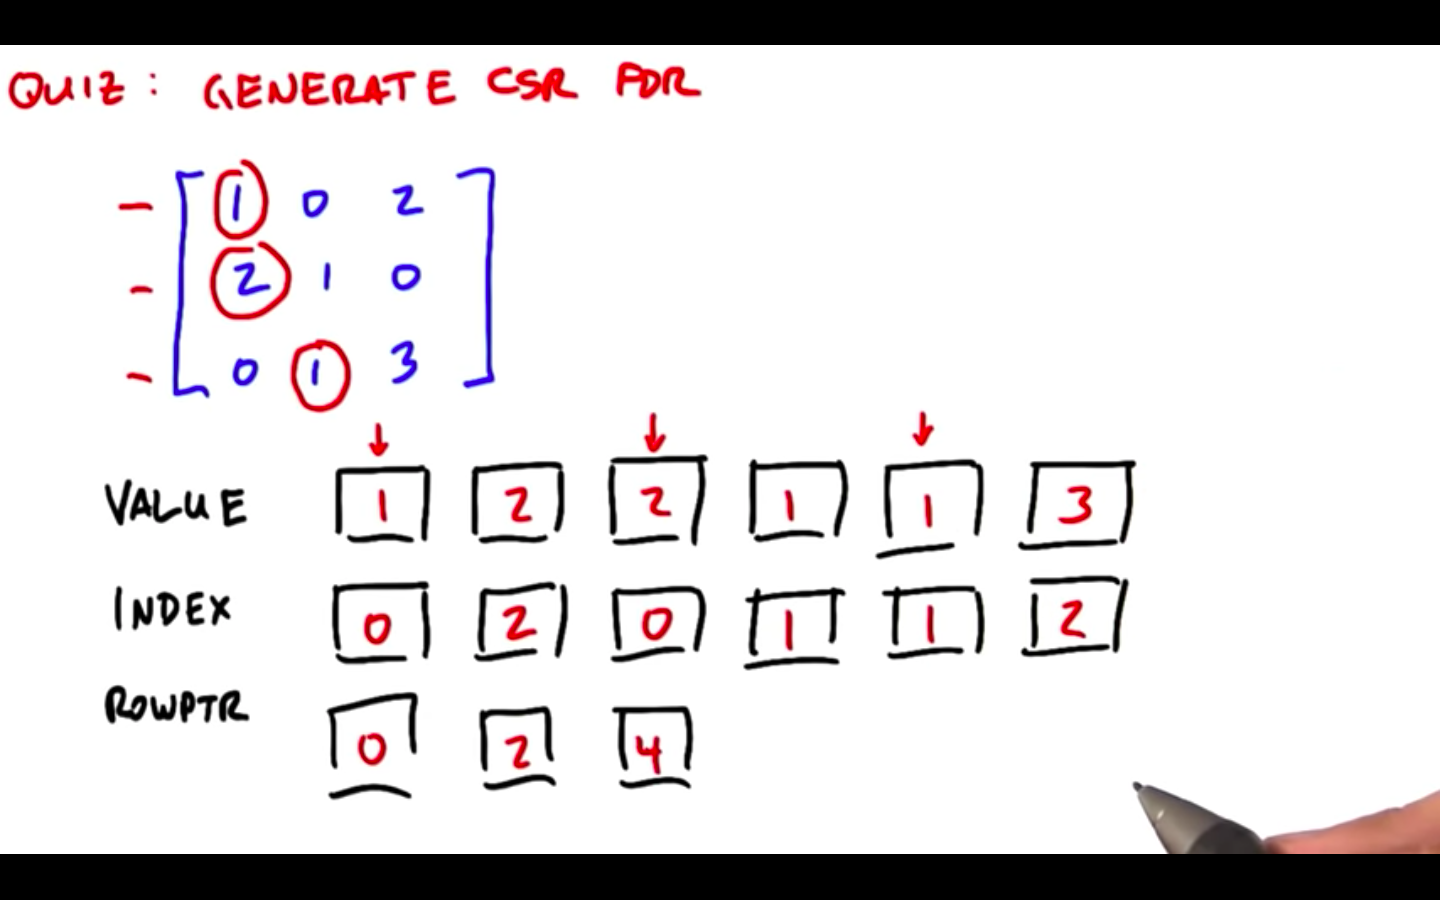

######  Translate a regular matrix A into CSR format

This is done by implementing the definition of `CSR format`, given above.

In [ ]:
# construct the document-term matrix in CSR format
# i.e. return (values, column_indices, row_pointer)
def get_doc_term_matrix(text_list, n_terms):
    """
    Args:
    -----
       text_list: a TextList object
       n_terms  : the number of tokens in our IMDb vocabulary
    
    Returns:
    -------- 
       the CSR format sparse representation of the document-term matrix in the 
       form of a `scipy.sparse.csr.csr_matrix` object.
    """
    
    # initialize arrays
    values = []
    column_indices = []
    row_pointer = []
    row_pointer.append(0)

    # from the TextList object
    for _, doc in enumerate(text_list):
        feature_counter = Counter(doc.data)
        column_indices.extend(feature_counter.keys())
        values.extend(feature_counter.values())
        # Tack on N (number of nonzero elements in the matrix) to the end of the row_pointer array
        row_pointer.append(len(values))
        
    return scipy.sparse.csr_matrix((values, column_indices, row_pointer),
                                   shape=(len(row_pointer) - 1, n_terms),
                                   dtype=int)

###### Reconstruct a regular matrix from its CSR sparse representation

Given a CSR format sparse matrix representation $(\text{values},\text{column_indices}, \text{row_pointer})$ of a $\text{m}\times \text{n}$ matrix $\text{A}$, <br> how can we recover $\text{A}$?

First create $\text{m}\times \text{n}$ matrix with all zeros.
We will recover $\text{A}$ by overwriting the entries in the zeros matrix row by row with the non-zero entries in $\text{A}$ as follows:

In [ ]:
def CSR_to_full(values, column_indices, row_ptr, m,n):
    A = zeros(m,n)
    for row in range(n):
        if row_ptr is not null:
            A[row,column_indices[row_ptr[row]: row_ptr[row+1]]] = values[row_ptr[row]:row_ptr[row+1]]
    return A


### <b style='color:#C71585'> Complexity Analysis

- [The Complete Guide to Big O Notation & Complexity Analysis for Algorithms: Part 1 of 2](https://www.youtube.com/watch?v=HfIH3czXc-8&list=PLxQ8cCJ6LyOZHhAjIYrEFWcfYdyJl5VYf&index=2)
- [The Complete Guide to Big O Notation & Complexity Analysis for Algorithms: Part 2 of 2](https://www.youtube.com/watch?v=zo7YFqw5hNw&list=PLxQ8cCJ6LyOZHhAjIYrEFWcfYdyJl5VYf&index=1)
- [2 Rules to Simplifying Big O](https://www.youtube.com/watch?v=sTtOu10mW5c&list=PLxQ8cCJ6LyOZHhAjIYrEFWcfYdyJl5VYf&index=7)

##### Anlysize the following from solutions:

- [LeetCode: suggested_products](https://leetcode.com/problems/search-suggestions-system/)

##### Selection in expected linear time:

##### The look-and-say problem. - [EPI: 6.8] [YT](https://www.youtube.com/watch?v=ea7lJkEhytA)

- Write a program that takes as input an integer `n` and returns the n-th interger in the look-and-say sequence. Return the result as a string.

The "look-and-say" problem is a sequence generation problem that involves describing a sequence of numbers based on the spoken description of its elements. This problem is also known as the "count and say" problem. The sequence is generated iteratively, where each term is obtained by "reading" the previous term out loud and describing its elements in terms of counts of consecutive identical digits.

The problem can be stated as follows:

- Start with the first term: "1".
- For each subsequent term, read the previous term out loud and count the consecutive occurrences of each digit.
- Describe the count and the digit itself to generate the next term.
- For example, the first few terms of the look-and-say sequence are:

    -    `1`
    -    `11 (One 1)`
    -    `21 (Two 1s)`
    -    `1211 (One 2, One 1)`
    -    `111221 (One 1, One 2, Two 1s)`
    -    `...`


The problem is typically defined as follows:

- Start with a seed value, which is usually the number 1.
- Read off the digits of the seed value, counting the number of digits in groups of the same digit. For example, if the seed value is 1123, you would read it as "two 1s, one 2, one 3."
- Generate the next value in the sequence by concatenating the count and the digit for each group. Using the previous example, the next value would be "211213."
- Repeat steps 2 and 3, using the generated value as the new seed value.

In [ ]:
def look_and_say(n: int) -> str:

    def _next_seq(s: str) -> str:
        res = []
        count = 1
        for i in range(1, len(s)):
            if s[i] == s[i-1]:
                count += 1
            else:
                res.append(str(count) + s[i-1])
                count = 1
        
        res.append(str(count) + s[-1])
        
        return ''.join(res)

    s = '1'
    for _ in range(1, n):
        s = _next_seq(s)
    return s

**Time Complexity**: Each successive number can have at most twice as many digits as the previous number - this happens when all the digits are different. This means the maximum-length number has lentrh no more than $2^n$. Since there are n iterations and the work in each iteration is proportional to the length of the number computed in the iteration, a simple bound on the time complexity is $O(n \cdot 2^n)$

##### Order Statistics:

In [ ]:
def find_kth_smallest(k, A):
    def find_kth(comp):
        """Partition A[low:high + 1] around pivot_idx.
        
        After partitioning, A[low:new_pivot_idx] contains elements that are
        "less than" the pivot, and A[new_pivot_idx + 1:high + 1] contains
        elements that are "greater than" the pivot.
        """
        def partition_around_pivot(low, high, pivot_idx):
            """Returns the new index of the pivot element after partition."""
            pivot_value = A[pivot_idx]
            new_pivot_idx = low
            swap(A, pivot_idx, high)

            for i in range(low, high):
                if comp(A[i], pivot_value):
                    swap(A, new_pivot_idx, i)
                    new_pivot_idx += 1

            swap(A, new_pivot_idx, high)
            return new_pivot_idx

        low, high = 0, len(A) - 1
        while low <= high:
            print(low, high)
            print(A)
            sleep(1)
            # Generates a random integer in [low, high].
            pivot_idx = randint(low, high)
            ith_smallest = partition_around_pivot(low, high, pivot_idx)

            if ith_smallest + 1 < k: low = ith_smallest + 1
            elif ith_smallest + 1 > k: high = ith_smallest - 1
            else: return A[ith_smallest]

    return find_kth(lt)

In [ ]:
def test_find_kth_smallest():
#     L = sample([*range(500)], 100)
#     k = randint(1, len(L))
    L = sorted([*range(10)], reverse=True)
    k = 1

    expected = sorted(L)[k - 1]
    returned = find_kth_smallest(k, L)
#     print(k, expected, returned, L)
    assert expected == returned

test_find_kth_smallest()

- $\mathcal{O}(N) = N/2 + N/4 + N/8 + \dots + 1$

In [ ]:
import random

def select_nth(n, items):
    pivot = random.choice(items)

    lesser = [item for item in items if item < pivot]
    if len(lesser) > n: return select_nth(n, lesser)
    n -= len(lesser)

    numequal = items.count(pivot)
    if numequal > n: return pivot
    n -= numequal

    greater = [item for item in items if item > pivot]
    return select_nth(n, greater)

In [ ]:
def test_select_nth():
    L = [randint(-10,10) for _ in range(15)]
    print(L, select_nth(2, L), sep='\n')

test_select_nth()

You can trivially turn this into a method to find medians:

In [ ]:
def median(items):
    if len(items) % 2:
        return select_nth(len(items)//2, items)

    else:
        left  = select_nth((len(items)-1) // 2, items)
        right = select_nth((len(items)+1) // 2, items)

        return (left + right) / 2

In [ ]:
def test_median():
    L = [randint(-10,10) for _ in range(15)]
    print(L, median(L), sep='\n')

test_median()

##### Finding the kth smallest element in a sequence where duplicates are compressed?

I've been asked to write a program to find the kth order statistic of a data set consisting of character and their occurrences. For example, I have a data set consisting of [B,A,C,A,B,C,A,D]. Here I have A with 3 occurrences, B with 2 occurrences C with 2 occurrences and D with on occurrence. They can be grouped in pairs (characters, number of occurrences), so, for example, we could represent the above sequence as

(A,3), (B,2), (C,2) and (D,1). Assuming than `k` in the number of these pairs, I am asked to find the kth of the data set in `O(n)` where `n` is the number of pairs.

I thought could sort the element based their number of occurrence and find their kth smallest elements, but that won't work in the time bounds. Can I please have some help on the algorithm for this problem?

Answer:

Assuming that you have access to a linear-time selection algorithm, here's a simple divide-and-conquer algorithm for solving the problem. I'm going to let `k` denote the total number of pairs and `m` be the index you're looking for.

- If there's just one pair, return the key in that pair.
Otherwise:
 - Using a linear-time selection algorithm, find the median element. Let `medFreq` be its frequency.
 - Sum up the frequencies of the elements less than the median. Call this `less`. Note that the number of elements less than or equal to the median is `less + medFreq`.
  - If `less` < m < `less + medFreq`, return the key in the median element.
  - Otherwise, if m ≤ `less`, recursively search for the mth element in the first half of the array.
  - Otherwise (m > `less + medFreq`), recursively search for the (m - `less` - `medFreq`)th element in the second half of the array.
  
  
The key insight here is that each iteration of this algorithm tosses out half of the pairs, so each recursive call is on an array half as large as the original array. This gives us the following recurrence relation:

T(k) = T(k / 2) + O(k)

#### Machine Learning Algorithms

- [Medium: Computational Complexity of ML Models](https://medium.com/analytics-vidhya/time-complexity-of-ml-models-4ec39fad2770)
- [Computational complexity of machine learning algorithms](https://www.thekerneltrip.com/machine/learning/computational-complexity-learning-algorithms/)

#### 